# Lead Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

## Goals of the Case Study

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

In [1]:
# Importing the Libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

# Setting Pandas option
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth',255)
pd.set_option('display.max_info_columns',200)
pd.set_option('display.max_info_rows',200)
pd.set_option('display.width',200)
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the Data

In [2]:
# Importing the data 
leads1 = pd.read_csv('Leads.csv')
leads1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
leads1.shape

(9240, 37)

In [4]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   Prospect ID                                    object 
 1   Lead Number                                    int64  
 2   Lead Origin                                    object 
 3   Lead Source                                    object 
 4   Do Not Email                                   object 
 5   Do Not Call                                    object 
 6   Converted                                      int64  
 7   TotalVisits                                    float64
 8   Total Time Spent on Website                    int64  
 9   Page Views Per Visit                           float64
 10  Last Activity                                  object 
 11  Country                                        object 
 12  Specialization                                 o

In [5]:
leads1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


#### Numeric columns

In [6]:
print(len(leads1.describe().columns))
leads1.describe().columns

7


Index(['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], dtype='object')

#### Categorical columns 

In [7]:
catCols = [col for col in leads1.columns if leads1[col].dtype=="O"]
len(catCols)

30

##### Observations

- we have to modify the column names
- Prospect ID and Lead Number are unique identifiers. They both have the same purpose hence its better to drop one of them(Prospect ID)
- few columns have "select" as their entries. These are essentially null values because Select appears when someone does not select anything from the dropdown


# Cleaning the Data

### Renaming the Columns

In [8]:
# changing to snakecase and lowercase
leads1.columns = leads1.columns.str.replace(' ', '_').str.lower()
leads1.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source', 'do_not_email', 'do_not_call', 'converted', 'totalvisits', 'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education', 'what_is_your_current_occupation', 'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations', 'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'lead_profile', 'city', 'asymmetrique_activity_index', 'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score', 'i_agree_to_pay_the_amount_through_cheque', 'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [9]:
# shorten column names
leads1.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

leads1.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


### Dropping the prospect_id column

In [10]:
leads1.drop('prospect_id', axis = 1,inplace = True)
leads1.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified


### Replacing 'select' category with null values

In [11]:
# function to find out the columns containing "Select" values
def select(df):
    
    # selecting the categorical columns
    df_obj = leads1.select_dtypes(include='object') 
    # Find out columns that have "Select"
    s = lambda x: x.str.contains('Select', na=False)
    select_col = df_obj.columns[df_obj.apply(s).any()].tolist()
    
    return select_col

select_columns = select(leads1)
select_columns

['specialization', 'source', 'lead_profile', 'city']

#### Replacing the values of four columns wich contain "select"values ,with null values

In [12]:
leads1[select_columns] = leads1[select_columns].replace('Select', np.NaN)
select(leads1)

[]

### Handling the Null values 

In [13]:
# calculating the percentage of null values
null_value = (leads1.isnull().sum() / leads1.shape[0])*100
null_value

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
lead_quality                   51.59
supply_chain_content_updates    0.00
dm_content_updates              0.00
l

##### Observations

There are a few columns with percentage of null values > 40%. So we are dropping the columns having missing values >40%.

### Dropping the columns which have null values > 40%

In [14]:
null_column = null_value[null_value.values>40]
null_column.index

Index(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score'], dtype='object')

In [15]:
# dropping the columns
leads2 = leads1.drop(null_column.index, axis = 1)

#### Dropping tags

In [16]:
leads2 = leads2.drop('tags', axis = 1)
leads2.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview,last_notable_activity
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified


In [17]:
leads2.shape

(9240, 28)

In [18]:
# Calculate percentage of null values for each column
(leads2.isnull().sum() / leads2.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
l

##### Observation

five columns with percentage of null values > 20%

#### Country column

In [19]:
leads2.country.value_counts(normalize = True, dropna = False) * 100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

##### Observation

- "country" column indicates the country of the customer
- with India + null values = 97% of the total. It is safe to drop this column.

In [20]:
leads3 = leads2.drop('country', axis = 1)

#### course_selection_reason Column

In [21]:
leads3.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: course_selection_reason, dtype: float64

##### Observation

The distribution of the data is very heavily skewed, with Better career prospects + null values = approx 100% of the total. It is safe to drop this column.

In [22]:
leads4 = leads3.drop('course_selection_reason', axis = 1)

#### occupation column

In [23]:
leads4.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

##### Observation

For occupation, we can first combine categories, and then impute proportionally to maintain the distribution and not introduce bias

In [24]:
# combine low representing categories
leads4.loc[(leads4.occupation == 'Student') | (leads4.occupation == 'Other') | (leads4.occupation == 'Housewife') | 
       (leads4.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [25]:
leads4.occupation.value_counts(normalize = True) * 100

Unemployed             85.50
Working Professional   10.78
Student and Others      3.73
Name: occupation, dtype: float64

In [26]:
# impute proportionately
leads4['occupation'] = leads4.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(leads4))))

In [27]:
leads4.occupation.value_counts(normalize = True) * 100

Unemployed             85.69
Working Professional   10.73
Student and Others      3.58
Name: occupation, dtype: float64

#### specialization column

In [28]:
leads4.specialization.value_counts(normalize = True, dropna = False)*100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

In [29]:
leads4.specialization.value_counts(normalize = True)*100

Finance Management                  16.66
Human Resource Management           14.47
Marketing Management                14.30
Operations Management                8.58
Business Administration              6.88
IT Projects Management               6.25
Supply Chain Management              5.96
Banking, Investment And Insurance    5.77
Travel and Tourism                   3.46
Media and Advertising                3.46
International Business               3.04
Healthcare Management                2.71
Hospitality Management               1.95
E-COMMERCE                           1.91
Retail Management                    1.71
Rural and Agribusiness               1.25
E-Business                           0.97
Services Excellence                  0.68
Name: specialization, dtype: float64

##### Observations

- 36% of data are missing
- Almost > 40 % data are skwed therefore dropping the column

In [30]:
leads4 = leads4.drop('specialization', axis = 1)

#### city column

In [31]:
leads4.city.value_counts(normalize = True, dropna = False) * 100

NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: city, dtype: float64

In [32]:
leads4.city.value_counts(normalize = True) * 100

Mumbai                        57.84
Thane & Outskirts             13.50
Other Cities                  12.31
Other Cities of Maharashtra    8.20
Other Metro Cities             6.82
Tier II Cities                 1.33
Name: city, dtype: float64

##### Observation

- Almost 40% of data are missing
Therefore dropping the column

In [33]:
leads4 = leads4.drop('city', axis = 1)

### Handling the Categorical columns

In [34]:
(leads4.isnull().sum() / leads4.shape[0]) * 100

lead_number                    0.00
lead_origin                    0.00
lead_source                    0.39
do_not_email                   0.00
do_not_call                    0.00
converted                      0.00
total_visits                   1.48
time_on_website                0.00
page_views_per_visit           1.48
last_activity                  1.11
occupation                     0.00
search                         0.00
magazine                       0.00
newspaper_article              0.00
x_education_forums             0.00
newspaper                      0.00
digital_advertisement          0.00
through_recommendations        0.00
courses_updates                0.00
supply_chain_content_updates   0.00
dm_content_updates             0.00
cheque_payment                 0.00
mastering_interview            0.00
last_notable_activity          0.00
dtype: float64

In [35]:
# finding the number of unique values for all object datatype columns
for k, v in leads4.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
last_activity = 17
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
cheque_payment = 1
mastering_interview = 2
last_notable_activity = 16


##### Observations

- From the above output, the categorical columns with number of unique values > 2 are:

lead_origin
lead_source
last_notable_activity
last_activity

- There are lots of columns having only one unique value, we can drop those columns

magazine
courses_updates
supply_chain_content_updates
dm_content_updates
cheque_payment

#### Lead_origin column

In [36]:
leads4.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: lead_origin, dtype: float64

In [37]:
# grouping the values 'Lead Add Form ', 'Lead Import ' and 'Quick Add Form ' into the value 'Lead Add Form and Others'
leads4.loc[(leads4.lead_origin == 'Lead Import') | (leads4.lead_origin == 'Quick Add Form') | (leads4.lead_origin == 'Lead Add Form')
      , 'lead_origin'] = 'Lead Add Form and Others'

#### lead_source column

In [38]:
leads4.lead_source.value_counts(normalize = True, dropna = False) * 100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: lead_source, dtype: float64

In [39]:
# imputing the missing values with the mode of data i.e. clearly 'Google'
leads4.lead_source.fillna(leads4.lead_source.mode()[0], inplace=True)

In [40]:
#grouping the other smaller values into 'Other Social Sites'
leads4['lead_source'] = leads4['lead_source'].apply(lambda x: x if 
                                           ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                            (x=='Organic Search') | (x=='Reference'))                                            
                                              else 'Other Social Sites')

#### last_notable_activity

In [41]:
leads4.last_notable_activity.value_counts(normalize = True, dropna = False)*100

Modified                       36.87
Email Opened                   30.60
SMS Sent                       23.51
Page Visited on Website         3.44
Olark Chat Conversation         1.98
Email Link Clicked              1.87
Email Bounced                   0.65
Unsubscribed                    0.51
Unreachable                     0.35
Had a Phone Conversation        0.15
Email Marked Spam               0.02
Approached upfront              0.01
Resubscribed to emails          0.01
View in browser link Clicked    0.01
Form Submitted on Website       0.01
Email Received                  0.01
Name: last_notable_activity, dtype: float64

In [42]:
#grouping the other smaller values into 'Other notable activity'
leads4['last_notable_activity'] = leads4['last_notable_activity'].apply(lambda x: x if 
                                           ((x== 'Modified') | (x=='Email Opened') | (x=='SMS Sent'))                                            
                                              else 'other_notable_activity')

#### Dropping the columns having only one unique value

In [43]:
leads5 = leads4.drop(['magazine', 'courses_updates', 'supply_chain_content_updates', 'dm_content_updates',
                'cheque_payment'], axis = 1)

#### Checking the columns having only two possible unique value

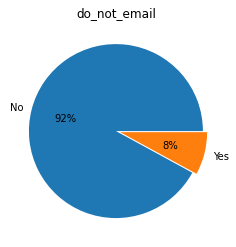

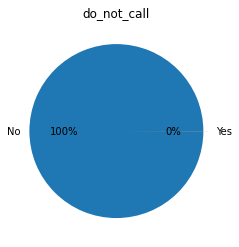

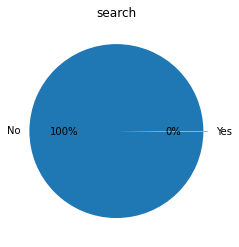

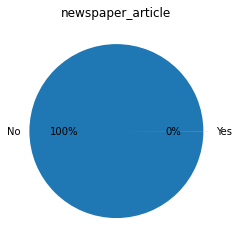

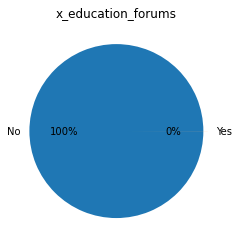

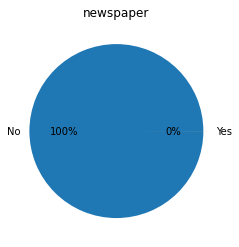

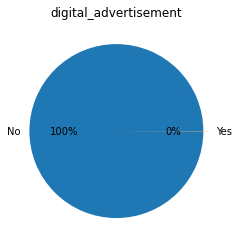

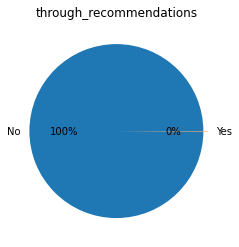

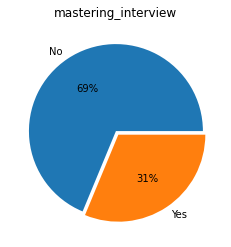

In [44]:
binary_cols = ['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']

for i in binary_cols:
    
    plt.pie(leads5[i].value_counts(normalize=True)*100,labels = leads5[i].unique(),explode=(0,0.05),autopct='%1.f%%')
    plt.title(i)
    plt.show()

##### Observations

- There is an data imbalance in the columns

do_not_call
search
newspaper_article
x_education_forums
newspaper
digital_advertisement
through_recommendations

therefore dropping these columns

In [45]:
leads6 = leads5.drop(['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
                'newspaper', 'digital_advertisement', 'through_recommendations'], axis = 1)

In [46]:
(leads6.isnull().sum() / leads6.shape[0]) * 100

lead_number             0.00
lead_origin             0.00
lead_source             0.00
do_not_email            0.00
converted               0.00
total_visits            1.48
time_on_website         0.00
page_views_per_visit    1.48
last_activity           1.11
occupation              0.00
mastering_interview     0.00
last_notable_activity   0.00
dtype: float64

#### last_activity column

In [47]:
leads6['last_activity'].value_counts(normalize = True, dropna = False)*100

Email Opened                   37.20
SMS Sent                       29.71
Olark Chat Conversation        10.53
Page Visited on Website         6.93
Converted to Lead               4.63
Email Bounced                   3.53
Email Link Clicked              2.89
Form Submitted on Website       1.26
NaN                             1.11
Unreachable                     1.01
Unsubscribed                    0.66
Had a Phone Conversation        0.32
Approached upfront              0.10
View in browser link Clicked    0.06
Email Received                  0.02
Email Marked Spam               0.02
Visited Booth in Tradeshow      0.01
Resubscribed to emails          0.01
Name: last_activity, dtype: float64

In [48]:
# 'Last Activity' have 1.11 % 'NaN' values
# Imputing values for 'last Activity'
# Replacing 'NaN' with 'Email Opened'
leads6['last_activity'] = leads6['last_activity'].fillna('Email Opened')

In [49]:
#grouping the other smaller values into 'other_last_activity'
leads6['last_activity'] = leads6['last_activity'].apply(lambda x: x if 
                                           ((x== 'Email Opened') | (x=='SMS Sent') | (x=='Olark Chat Conversation') | 
                                            (x== 'Page Visited on Website') | (x=='Converted to Lead') | (x=='Email Bounced') | 
                                            (x=='Email Link Clicked'))                                            
                                              else 'Other Social Sites')

### Handling Numerical Columns

In [50]:
leads6.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,occupation,mastering_interview,last_notable_activity
0,660737,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Student and Others,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Other Social Sites,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Unemployed,No,Modified


#### List of Numerical Columns

In [51]:
leads6.describe().columns

Index(['lead_number', 'converted', 'total_visits', 'time_on_website', 'page_views_per_visit'], dtype='object')

##### Observations

- The column "page_views_per_visit" need to handle the missing values, and convert the datatype to integer since visits can't be decimal
- "total_visits" column need to handle the missing values, and convert the datatype to integer since visits can't be decimal
- "lead_number" column is a unique identifier of the records therefore channge its datatype to "object"


#### lead_number Column

In [52]:
# changing data type to "object"
leads6.lead_number = leads6.lead_number.astype('object')

#### total_visits Column

In [53]:
# missing values
leads6.total_visits.isnull().sum()

137

In [54]:
# replacing the null values with the median and changing dtype to int
leads6.total_visits.fillna(leads6.total_visits.median(), inplace=True)
leads6.total_visits = leads6.total_visits.astype('int')

#### page_views_per_visit column

In [55]:
# missing values
leads6.page_views_per_visit.isnull().sum()

137

In [56]:
# replacing the null values with the median and changing dtype to int
leads6.page_views_per_visit.fillna(leads6.page_views_per_visit.median(), inplace=True)
leads6.page_views_per_visit = leads6.page_views_per_visit.astype('int')

In [57]:
leads6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   lead_number            object
 1   lead_origin            object
 2   lead_source            object
 3   do_not_email           object
 4   converted              int64 
 5   total_visits           int32 
 6   time_on_website        int64 
 7   page_views_per_visit   int32 
 8   last_activity          object
 9   occupation             object
 10  mastering_interview    object
 11  last_notable_activity  object
dtypes: int32(2), int64(2), object(8)
memory usage: 794.2+ KB


In [58]:
(leads6.isnull().sum() / leads6.shape[0]) * 100

lead_number             0.00
lead_origin             0.00
lead_source             0.00
do_not_email            0.00
converted               0.00
total_visits            0.00
time_on_website         0.00
page_views_per_visit    0.00
last_activity           0.00
occupation              0.00
mastering_interview     0.00
last_notable_activity   0.00
dtype: float64

In [59]:
leads = leads6

In [60]:
leads.shape

(9240, 12)

# Exploratory Data Analysis

In [61]:
leads.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,occupation,mastering_interview,last_notable_activity
0,660737,API,Olark Chat,No,0,0,0,0,Page Visited on Website,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5,674,2,Email Opened,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,Student and Others,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1,Other Social Sites,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2,1428,1,Converted to Lead,Unemployed,No,Modified


#### Numeric Columns

In [62]:
numeric_cols = leads.describe().columns
numeric_cols

Index(['converted', 'total_visits', 'time_on_website', 'page_views_per_visit'], dtype='object')

### Univariate Analysis on Numeric columns

In [63]:
num_col = ['total_visits', 'time_on_website', 'page_views_per_visit']

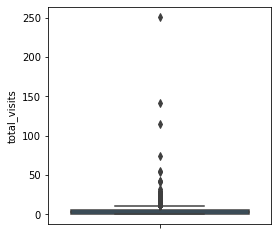

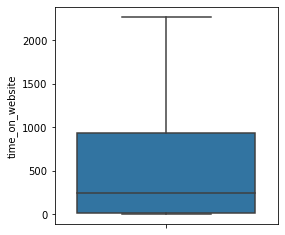

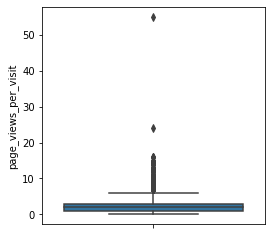

In [64]:
def univariate_analysis_num_col(col):
    plt.figure(figsize=(4, 4))
    ax = sns.boxplot(y = col, data = leads)
    plt.show()

for col in num_col:
    univariate_analysis_num_col(col)

##### Observations

- There is a low variation in "page_views_per_visit" and "total_visit" columns and a large variation in "time_on_website" column
- There are outliers in both total_visits and page_views_per_visit columns

In [65]:
leads[['total_visits', 'page_views_per_visit']].describe(percentiles = [0.80, 0.85, 0.90, 0.95, 0.97, 0.99, 0.999])

,total_visits,page_views_per_visit
count,9240.00,9240.00
mean,3.44,2.29
std,4.82,2.15
min,0.00,0.00
50%,3.00,2.00
80%,5.00,4.00
85%,6.00,4.00
90%,7.00,5.00
95%,10.00,6.00
97%,11.00,7.00


#### Removing all the records if the value of "total_visits" or "page_views_per_visit" is > it's 99%
There are total 150 such records

In [66]:
len(leads[(leads['total_visits']>17) | (leads['page_views_per_visit']>9)])

150

In [67]:
leads = leads[~((leads['total_visits']>17) | (leads['page_views_per_visit']>9))]

### Univariate Analysis on Categorical Columns

In [68]:
cat_cols = [col for col in leads.columns if leads[col].dtype=="O"]
cat_cols.remove('lead_number')
cat_cols

['lead_origin',
 'lead_source',
 'do_not_email',
 'last_activity',
 'occupation',
 'mastering_interview',
 'last_notable_activity']

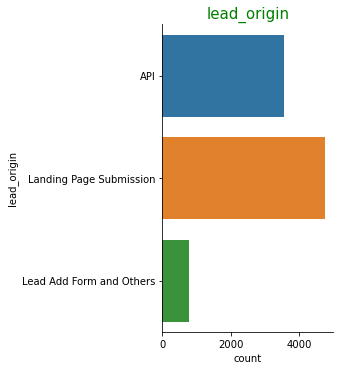

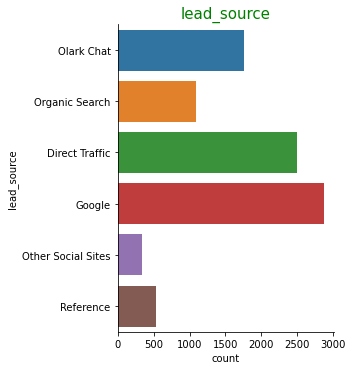

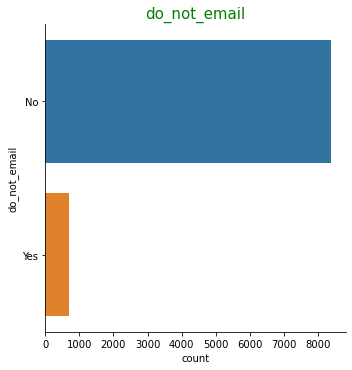

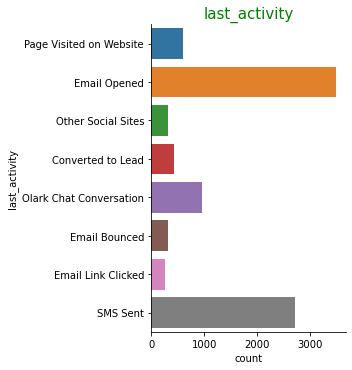

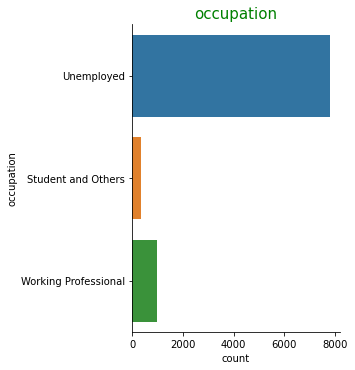

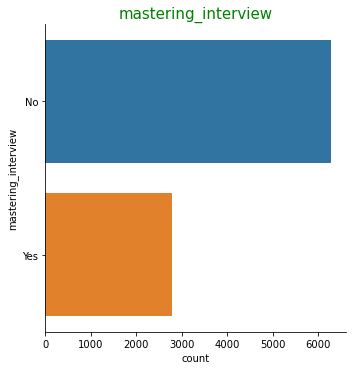

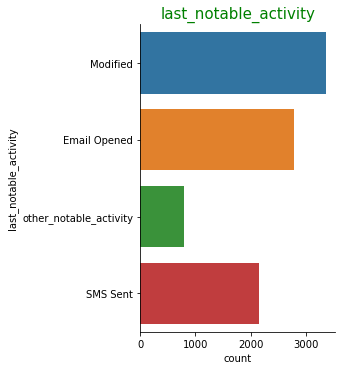

In [69]:
def univariate_analysis_cat_col(col):
    sns.catplot(y = col, data = leads, kind="count")
    plt.title(col, fontdict = {'fontsize': 15, 'fontweight': 5, 'color':'Green'})
    plt.show()
    
for col in cat_cols:
    univariate_analysis_cat_col(col)

##### Observations

- Major source of the leads are google, direct traffic, orlak chat
- Most of the leads are Unemployed
- Most of the leads prefer to Email and SMS


### Bivariate Analysis on Numerical Columns

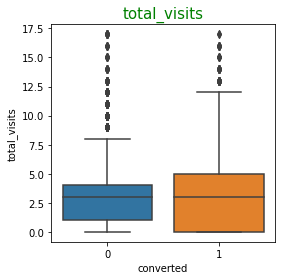

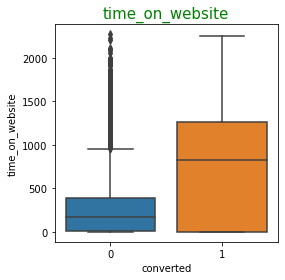

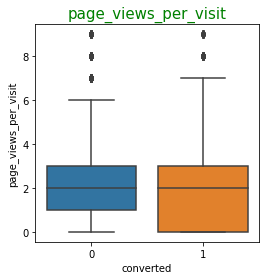

In [70]:
def bivariate_analysis_num_col(c1,c2):
    plt.figure(figsize=(4, 4))
    ax = sns.boxplot(x = c1, y = c2, data = leads)
    plt.title(c2, fontdict = {'fontsize': 15, 'fontweight': 5, 'color':'Green'})
    plt.show()
    
# Bivariate Analysis of Numerical Columns
for col in num_col:
    bivariate_analysis_num_col('converted',col)

##### Observations

- "page_views_per_visit" of converted lead and non converted lead has same median
- "time_on_website" of converted leads have much higher variation than non converted leads. And the median time_on_website is much higher for converted leads
- "total_visit" of converted leads have much higher variation than non converted leads, however both of them have same median


### Bivariate Analysis on Categorical Columns

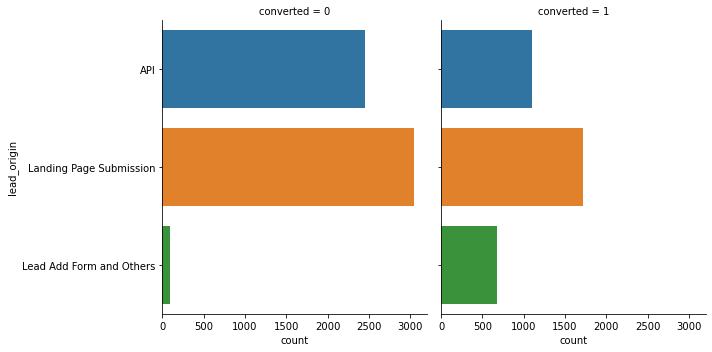

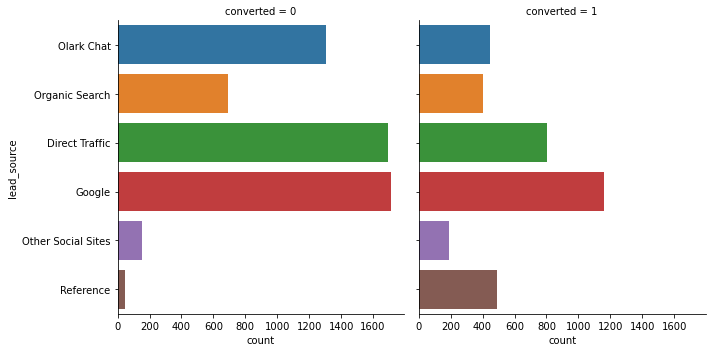

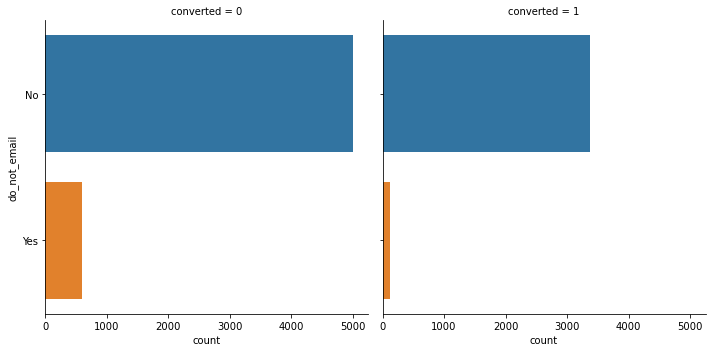

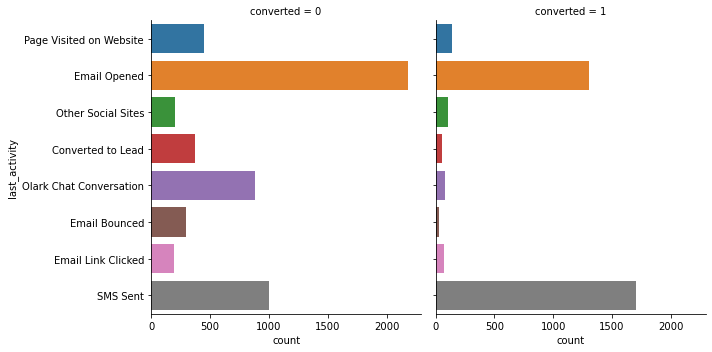

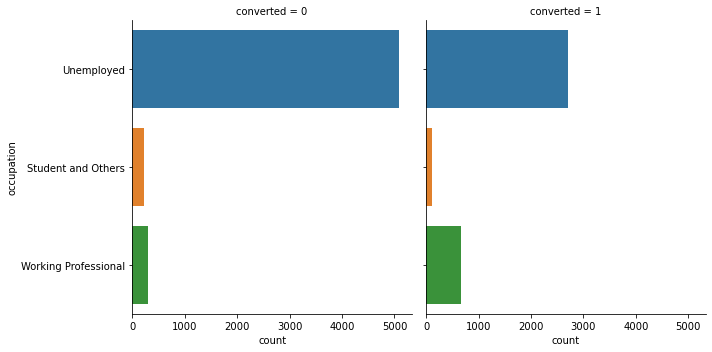

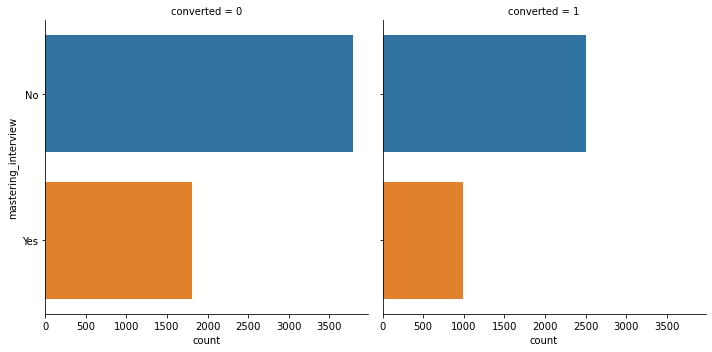

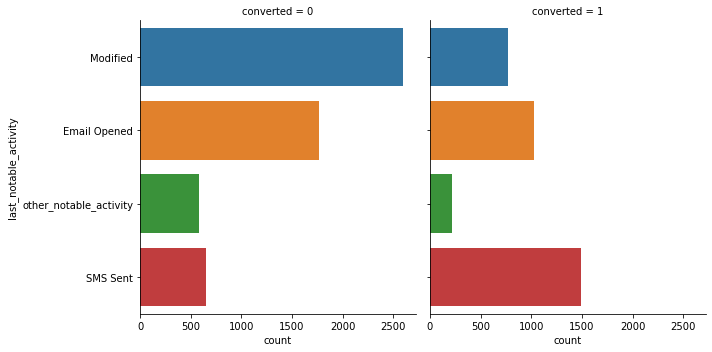

In [71]:
def bivariate_analysis_cat_col(c1,c2):
    sns.catplot(col = c1 ,y = c2, data =leads, kind="count")
    plt.show()
    
# Bivariate Analysis of Categorical Columns
for col in cat_cols:
    bivariate_analysis_cat_col('converted',col)

## Heat Map

<AxesSubplot:>

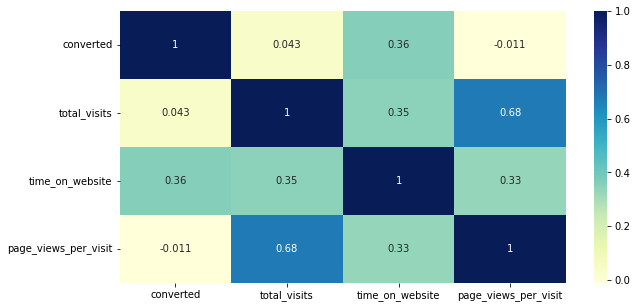

In [72]:
# Visualizing the correlation between all set of numeric columns
plt.figure(figsize=(10, 5))
sns.heatmap(leads.corr(), cmap="YlGnBu",annot=True)

##### Observations

- There is a much lower positive correlation between total_visits and converted
- There is positive correlation between Total Time Spent on Website and converted
- There is low negative correlation between Page Views Per Visit and TotalVisits with Conversion


# Data Preparation

In [73]:
leads.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,occupation,mastering_interview,last_notable_activity
0,660737,API,Olark Chat,No,0,0,0,0,Page Visited on Website,Unemployed,No,Modified
1,660728,API,Organic Search,No,0,5,674,2,Email Opened,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,Student and Others,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1,Other Social Sites,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,1,2,1428,1,Converted to Lead,Unemployed,No,Modified


### Converting Binary columns (Yes/No) to 0/1

In [74]:
binary_col = ['do_not_email', 'mastering_interview']

leads[binary_col] = leads[binary_col].apply(lambda x: x.map({'Yes':1, 'No':0}))

leads.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,occupation,mastering_interview,last_notable_activity
0,660737,API,Olark Chat,0,0,0,0,0,Page Visited on Website,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5,674,2,Email Opened,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2,Email Opened,Student and Others,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1,Other Social Sites,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1,Converted to Lead,Unemployed,0,Modified


In [75]:
cat_cols = [col for col in leads.columns if leads[col].dtype=="O"]
cat_cols.remove('lead_number')
cat_cols

['lead_origin',
 'lead_source',
 'last_activity',
 'occupation',
 'last_notable_activity']

### Creating dummy variable for categorical columns

In [76]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_1 = pd.get_dummies(leads[['lead_origin', 'lead_source', 'last_activity', 'occupation', 'last_notable_activity']], drop_first = True)
# Adding the results to the master dataframe
leads = pd.concat([leads, dummy_1], axis=1)

In [77]:
# Dropping the columns for which dummies have been created
leads.drop(['lead_origin', 'lead_source', 'last_activity', 'occupation', 'last_notable_activity'], axis = 1, inplace = True)
leads.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Olark Chat Conversation,last_activity_Other Social Sites,last_activity_Page Visited on Website,last_activity_SMS Sent,occupation_Unemployed,occupation_Working Professional,last_notable_activity_Modified,last_notable_activity_SMS Sent,last_notable_activity_other_notable_activity
0,660737,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,660728,0,0,5,674,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,660727,0,1,2,1532,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,660719,0,0,1,305,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,660681,0,1,2,1428,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [78]:
print(leads.shape)
print(leads.info())

(9090, 26)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                        Dtype 
---  ------                                        ----- 
 0   lead_number                                   object
 1   do_not_email                                  int64 
 2   converted                                     int64 
 3   total_visits                                  int32 
 4   time_on_website                               int64 
 5   page_views_per_visit                          int32 
 6   mastering_interview                           int64 
 7   lead_origin_Landing Page Submission           uint8 
 8   lead_origin_Lead Add Form and Others          uint8 
 9   lead_source_Google                            uint8 
 10  lead_source_Olark Chat                        uint8 
 11  lead_source_Organic Search                    uint8 
 12  lead_source_Other Social Sites                uint8 
 13  lead_so

In [79]:
leads.describe()

,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Olark Chat Conversation,last_activity_Other Social Sites,last_activity_Page Visited on Website,last_activity_SMS Sent,occupation_Unemployed,occupation_Working Professional,last_notable_activity_Modified,last_notable_activity_SMS Sent,last_notable_activity_other_notable_activity
count,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00,9090.00
mean,0.08,0.38,3.14,484.24,2.20,0.31,0.52,0.09,0.32,0.19,0.12,0.04,0.06,0.04,0.03,0.38,0.11,0.03,0.07,0.30,0.86,0.11,0.37,0.24,0.09
std,0.27,0.49,2.88,547.24,1.89,0.46,0.50,0.28,0.46,0.39,0.33,0.19,0.23,0.19,0.17,0.49,0.31,0.18,0.25,0.46,0.35,0.31,0.48,0.42,0.28
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,1.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,3.00,246.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,0.00,1.00,4.00,930.00,3.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00
max,1.00,1.00,17.00,2272.00,9.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [80]:
# percentage of null values per column
round(100*(leads.isnull().sum()/len(leads.index)),2)

lead_number                                    0.00
do_not_email                                   0.00
converted                                      0.00
total_visits                                   0.00
time_on_website                                0.00
page_views_per_visit                           0.00
mastering_interview                            0.00
lead_origin_Landing Page Submission            0.00
lead_origin_Lead Add Form and Others           0.00
lead_source_Google                             0.00
lead_source_Olark Chat                         0.00
lead_source_Organic Search                     0.00
lead_source_Other Social Sites                 0.00
lead_source_Reference                          0.00
last_activity_Email Bounced                    0.00
last_activity_Email Link Clicked               0.00
last_activity_Email Opened                     0.00
last_activity_Olark Chat Conversation          0.00
last_activity_Other Social Sites               0.00
last_activit

# Test-Train Split

In [81]:
# Putting feature variable to X
X = leads.drop(['lead_number', 'converted'], axis=1)
X.head(1)

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Olark Chat Conversation,last_activity_Other Social Sites,last_activity_Page Visited on Website,last_activity_SMS Sent,occupation_Unemployed,occupation_Working Professional,last_notable_activity_Modified,last_notable_activity_SMS Sent,last_notable_activity_other_notable_activity
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [82]:
# Putting response variable to y
y = leads['converted']
y.head(1)

0    0
Name: converted, dtype: int64

In [83]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify = y)

## Feature Scaling

In [84]:
scaler = StandardScaler()
# feature scaling on train set

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(X_train[['total_visits','time_on_website','page_views_per_visit']])

# feature scaling on test set

X_test[['total_visits','time_on_website','page_views_per_visit']] = scaler.transform(X_test[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Opened,last_activity_Olark Chat Conversation,last_activity_Other Social Sites,last_activity_Page Visited on Website,last_activity_SMS Sent,occupation_Unemployed,occupation_Working Professional,last_notable_activity_Modified,last_notable_activity_SMS Sent,last_notable_activity_other_notable_activity
591,0,-0.05,-0.85,-0.10,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
5447,0,-0.75,0.37,-0.63,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
7204,0,0.65,2.43,1.49,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2995,0,1.35,-0.75,-0.63,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1507,0,0.65,-0.31,-0.10,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [85]:
# checking the conversion rate
conversion = (sum(leads['converted'])/len(leads['converted'].index))*100
conversion

38.448844884488445

#### Coversion rate is 38.44%

## Looking at Correlations

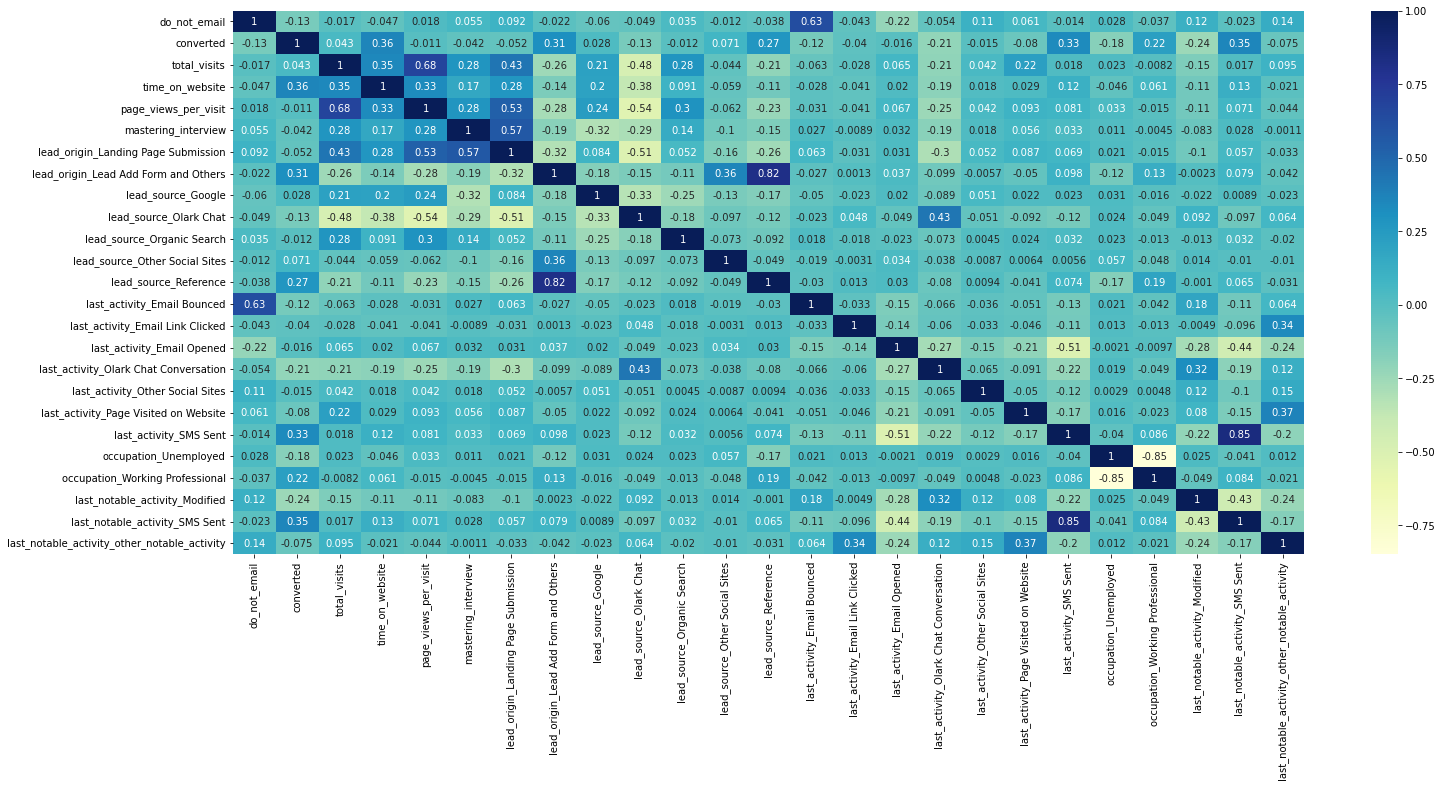

In [86]:
plt.figure(figsize = (24,10))       
sns.heatmap(leads.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Drop highly correlated dummy variables

In [87]:
X_test.drop(['lead_origin_Lead Add Form and Others', 'last_notable_activity_SMS Sent', 'page_views_per_visit','last_activity_Email Bounced', 
             'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Lead Add Form and Others', 'last_notable_activity_SMS Sent', 'page_views_per_visit','last_activity_Email Bounced',
             'occupation_Working Professional'], axis = 1, inplace = True)

### Checking the correlation matrix again

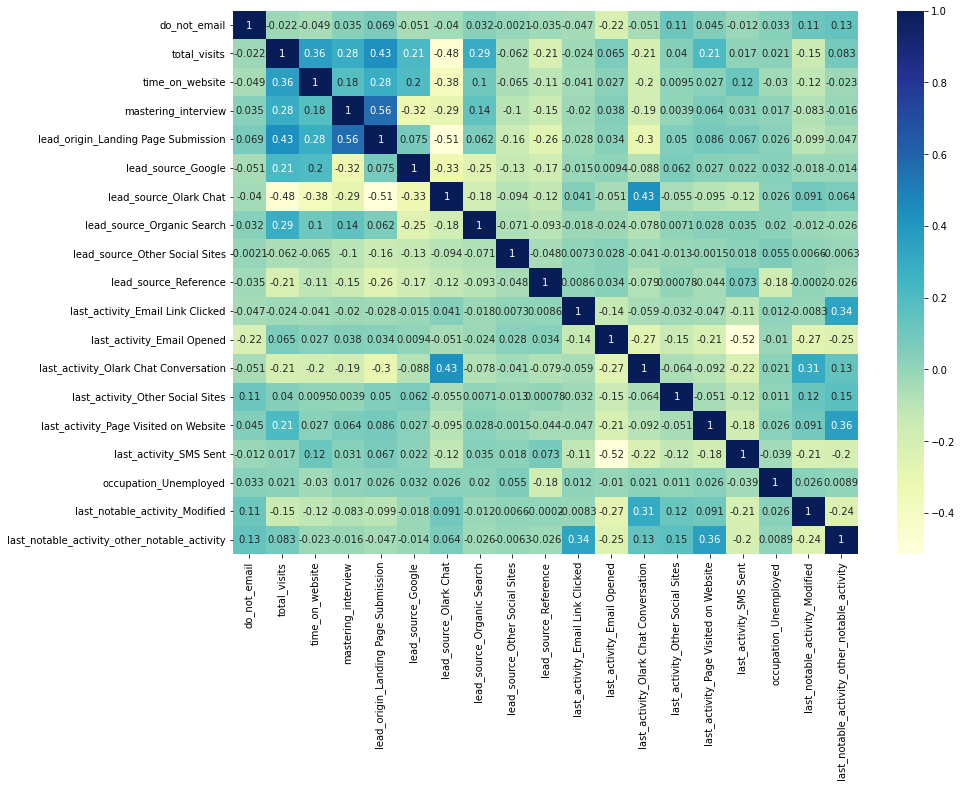

In [88]:
plt.figure(figsize = (14,10))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

# Model Building

### Building model using Logistic Regression with RFE 

In [89]:
# Running RFE with the output number of the variable equal to 15
logreg = LogisticRegression(C=1e-5,max_iter=50)
rfe = RFE(logreg, 15) 
rfe = rfe.fit(X,y)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)

[ True  True  True  True  True  True  True False  True  True False False
  True False  True  True  True  True  True]


#### RFE selected top 15 columns

In [90]:
# Listing out the top  15 columns that are selected in RFE (Automated selection of Predictors)
rfe_selected_predictors = X_train.columns[rfe.support_]
rfe_selected_predictors

Index(['do_not_email', 'total_visits', 'time_on_website', 'mastering_interview', 'lead_origin_Landing Page Submission', 'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Other Social Sites', 'lead_source_Reference', 'last_activity_Olark Chat Conversation', 'last_activity_Page Visited on Website', 'last_activity_SMS Sent', 'occupation_Unemployed',
       'last_notable_activity_Modified', 'last_notable_activity_other_notable_activity'],
      dtype='object')

In [91]:
# Excluded 4 columns
X_train.columns[~rfe.support_]

Index(['lead_source_Organic Search', 'last_activity_Email Link Clicked', 'last_activity_Email Opened', 'last_activity_Other Social Sites'], dtype='object')

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
def build_lr_model(col):
    
    print(f'Columns Count : {len(col)}')
    print(f'Columns : {col}')
    print('='*78)
  
    # Running the model using the selected variables
    X_train_sm = sm.add_constant(X_train[col])
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    print(res.summary())
  
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif, end='\n'+'='*78+'\n')
  
    # Getting the predicted values on the train set
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
  
    # Creating a dataframe with the actual converted flag and the predicted probabilities
    y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'conversion_Probability':y_train_pred})
    y_train_pred_final['Lead_ID'] = y_train.index
    
    # Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0
    y_train_pred_final['predicted'] = y_train_pred_final.conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
    y_train_pred_final = y_train_pred_final[['Lead_ID','converted','conversion_Probability', 'predicted']]
    print(y_train_pred_final)
    # Let's check the overall accuracy.
    print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)}')
    print('='*78)
  
    # Let's take a look at the confusion matrix  
    confusion = confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted)
    print('Let\'s take a look at Confusion Matrix')
    print(confusion)
    print('='*78)
    
    draw_roc(y_train_pred_final.converted, y_train_pred_final.conversion_Probability)




###  Model 1

Columns Count : 15
Columns : ['lead_source_Olark Chat', 'lead_source_Google', 'lead_origin_Landing Page Submission', 'mastering_interview', 'lead_source_Other Social Sites', 'lead_source_Reference', 'occupation_Unemployed', 'last_activity_Olark Chat Conversation', 'last_notable_activity_Modified', 'last_notable_activity_other_notable_activity', 'last_activity_Page Visited on Website', 'time_on_website', 'do_not_email', 'total_visits', 'last_activity_SMS Sent']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2905.8
Date:                Fri, 30 Dec 2022   Deviance:            

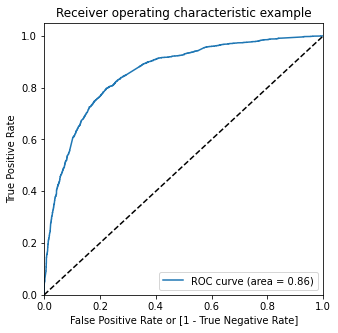

In [93]:
# considering all 15 the columns suggested by RFE for the model
selected_predictors = set(rfe_selected_predictors)
removed_predictors = set()
build_lr_model(list(selected_predictors-removed_predictors))

###  Model 2

Columns Count : 14
Columns : ['lead_source_Olark Chat', 'lead_source_Google', 'lead_origin_Landing Page Submission', 'lead_source_Other Social Sites', 'lead_source_Reference', 'occupation_Unemployed', 'last_activity_Olark Chat Conversation', 'last_notable_activity_Modified', 'last_notable_activity_other_notable_activity', 'last_activity_Page Visited on Website', 'time_on_website', 'do_not_email', 'total_visits', 'last_activity_SMS Sent']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.7
Date:                Fri, 30 Dec 2022   Deviance:                       5813.5
Time:

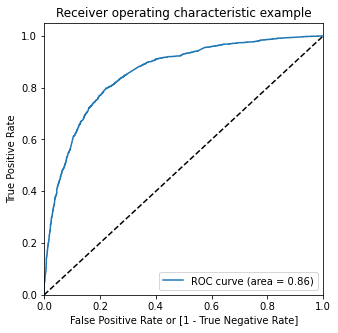

In [94]:
# Let's consider new set of columns suggested by RFE - removed columns for the next model
removed_predictors.add('mastering_interview')
build_lr_model(list(selected_predictors-removed_predictors))

###  Model 3

Columns Count : 13
Columns : ['lead_source_Olark Chat', 'lead_source_Google', 'lead_origin_Landing Page Submission', 'lead_source_Other Social Sites', 'lead_source_Reference', 'occupation_Unemployed', 'last_activity_Olark Chat Conversation', 'last_notable_activity_Modified', 'last_activity_Page Visited on Website', 'time_on_website', 'do_not_email', 'total_visits', 'last_activity_SMS Sent']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.8
Date:                Fri, 30 Dec 2022   Deviance:                       5815.5
Time:                        23:56:05   Pearson chi2:

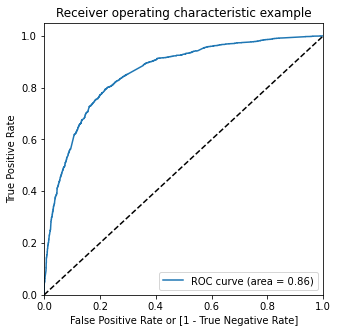

In [95]:
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('last_notable_activity_other_notable_activity')
build_lr_model(list(selected_predictors-removed_predictors))

###  Model 4

Columns Count : 12
Columns : ['lead_source_Olark Chat', 'lead_source_Google', 'lead_origin_Landing Page Submission', 'lead_source_Other Social Sites', 'lead_source_Reference', 'occupation_Unemployed', 'do_not_email', 'last_notable_activity_Modified', 'last_activity_Page Visited on Website', 'time_on_website', 'last_activity_Olark Chat Conversation', 'last_activity_SMS Sent']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2909.4
Date:                Fri, 30 Dec 2022   Deviance:                       5818.9
Time:                        23:56:08   Pearson chi2:                

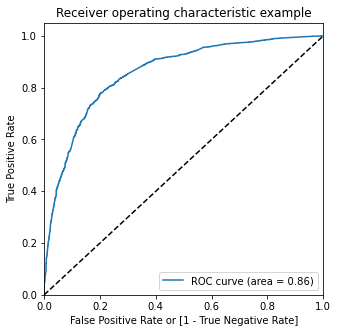

In [96]:
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('total_visits')
build_lr_model(list(selected_predictors-removed_predictors))

###  Model 5

Columns Count : 11
Columns : ['lead_source_Olark Chat', 'lead_source_Google', 'lead_origin_Landing Page Submission', 'lead_source_Other Social Sites', 'lead_source_Reference', 'occupation_Unemployed', 'do_not_email', 'last_notable_activity_Modified', 'time_on_website', 'last_activity_Olark Chat Conversation', 'last_activity_SMS Sent']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2910.8
Date:                Fri, 30 Dec 2022   Deviance:                       5821.6
Time:                        23:56:11   Pearson chi2:                 6.54e+03
No. Iterations:                

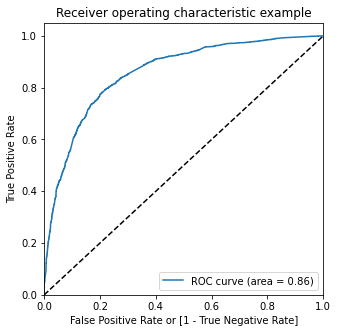

In [97]:
removed_predictors.add('last_activity_Page Visited on Website')
build_lr_model(list(selected_predictors-removed_predictors))

### Model 6

Columns Count : 10
Columns : ['lead_source_Olark Chat', 'lead_source_Google', 'lead_origin_Landing Page Submission', 'lead_source_Other Social Sites', 'lead_source_Reference', 'do_not_email', 'last_notable_activity_Modified', 'time_on_website', 'last_activity_Olark Chat Conversation', 'last_activity_SMS Sent']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2962.0
Date:                Fri, 30 Dec 2022   Deviance:                       5923.9
Time:                        23:56:35   Pearson chi2:                 6.57e+03
No. Iterations:                     6                   

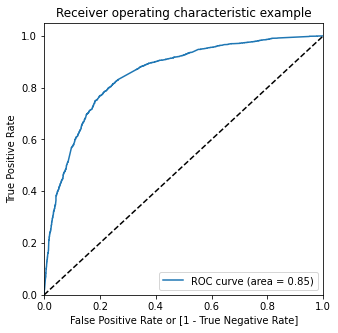

In [98]:
removed_predictors.add('occupation_Unemployed')
build_lr_model(list(selected_predictors-removed_predictors))

##### Observations

- The overall Accuracy of the final model is 78.35%
- All the features are significant because p-value < 0.05
- VIF values are also in acceptable range


## Model Evaluation And Making Predictions on Test Set


Both the p-values and VIFs seem decent enough for all the variables. So we can make predictions using this final set of features.

The evaluation matrix using is Sensitivity and Specificity

In this Business problem we have to improve the lead conversion rate to 80% from a rate of 30%. So we have to build a model with high sensitivity.

In [99]:
def build_lr_model_advanced(col):
    
    print(f'Columns : {col}')
    print('='*78)
  
    # Running the model using the selected variables
    X_train_sm = sm.add_constant(X_train[col])
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    print(res.summary())
  
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif, end='\n'+'='*78+'\n')
    # Getting the predicted values on the train set
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
  
   # Creating a dataframe with the actual churn flag and the predicted probabilities
    y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'conversion_Probability':y_train_pred})
    y_train_pred_final['Lead_ID'] = y_train.index
    y_train_pred_final.head()
  
    # Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0
    y_train_pred_final['predicted'] = y_train_pred_final.conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
    
    confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
    confusion
  
    # Let's check the overall accuracy.
    print('TRAIN SET SUMMARY AT CUTOFF 0.5')
    print('='*78)
    print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)}')
    
    ## Calculating the sensitivity and specificity

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    # Let's see the sensitivity of our logistic regression model
    print(f'sensitivity of train set model: {TP / float(TP+FN)}')
    # Let's see the specificity of our logistic regression model
    print(f'specificity of train set model: {TN / float(TN+FP)}')
    print('='*78)
  

    draw_roc(y_train_pred_final.converted, y_train_pred_final.conversion_Probability)
  
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_pred_final[i]= y_train_pred_final.conversion_Probability.map(lambda x: 1 if x > i else 0)
      
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1

        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
  
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()
  
    # Ask for user input based on curve, for the cut-off value
    
    ##cutoff = float(input('What should be the cut-off based on above plot (example 0.5)?'))
    print('Taking cut-off value as 0.35, from the plot above')
    cutoff = 0.35 # Taking value after observing graph
  
    y_train_pred_final['final_predicted'] = y_train_pred_final.conversion_Probability.map( lambda x: 1 if x > cutoff else 0)
  
    # Let's check the updated accuracy.
    print('\n')
    print('TRAIN TEST SUMMARY AT CUTOFF 0.35')
    print('='*78)
    print(f'Overall accuracy on train set: {metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)}')
    
    ## Calculating the sensitivity and specificity
    confusion1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
    confusion1
    TP = confusion1[1,1] # true positive 
    TN = confusion1[0,0] # true negatives
    FP = confusion1[0,1] # false positives
    FN = confusion1[1,0] # false negatives
    # Let's see the sensitivity of our logistic regression model
    print(f'sensitivity of train set model: {TP / float(TP+FN)}')
    # Let's see the specificity of our logistic regression model
    print(f'specificity of train set model: {TN / float(TN+FP)}')
    print('='*78)
    print('\n')
    
    print('PRECISION AND RECALL SCORES OF TRAIN SET')
    print('='*78)
    # Let's check the Precision Score.
    print(f'Precision Score of train set model: {precision_score(y_train_pred_final.converted, y_train_pred_final.predicted)}')
    # Let's check the Recall Score.
    print(f'Recall Score of train set model: {recall_score(y_train_pred_final.converted, y_train_pred_final.predicted)}')
    # Let's plot Precision-Recall Curve
    p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.conversion_Probability)
    plt.plot(thresholds, p[:-1], "g-")
    plt.plot(thresholds, r[:-1], "r-")
    plt.show()
    print('\n')
    
    print('MAKING PREDICTIONS ON TEST SET')
    
    print('='*78)

    # Making Prediction of Test Set
    X_test_sm = sm.add_constant(X_test[col])
    y_test_pred = res.predict(X_test_sm)
    y_pred_1 = pd.DataFrame(y_test_pred)
    # Converting y_test to dataframe
    y_test_df = pd.DataFrame(y_test)
    # Removing index for both dataframes to append them side by side 
    y_pred_1.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)
    # Appending y_test_df and y_pred_1
    y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
    # print(y_pred_final)
    # Renaming the column 
    y_pred_final= y_pred_final.rename(columns={ 0 : 'conversion_Probability'})
    y_pred_final['Lead_ID'] = y_test.index
    # Rearranging the columns
    y_pred_final = y_pred_final[['Lead_ID','converted','conversion_Probability']]
    y_pred_final['final_predicted'] = y_pred_final.conversion_Probability.map(lambda x: 1 if x > cutoff else 0)
    print(y_pred_final)
  
    # Let's check the overall accuracy on Test set
    print('\n')
    print('TEST SET SUMMARY')
    print('='*78)
    print(f'Overall accuracy on Test set: {metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted)}')
    print('='*78)
  
    confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted )
    confusion2
    TP = confusion2[1,1] # true positive 
    TN = confusion2[0,0] # true negatives
    FP = confusion2[0,1] # false positives
    FN = confusion2[1,0] # false negatives
    # Let's see the sensitivity of our logistic regression model
    print(f'sensitivity of our logistic regression model: {TP / float(TP+FN)}')
    print('='*78)
    # Let's see the specificity of our logistic regression model
    print(f'specificity of our logistic regression model: {TN / float(TN+FP)}')
    print('='*78)
    

Columns : ['lead_source_Olark Chat', 'lead_source_Google', 'lead_origin_Landing Page Submission', 'lead_source_Other Social Sites', 'lead_source_Reference', 'do_not_email', 'last_notable_activity_Modified', 'time_on_website', 'last_activity_Olark Chat Conversation', 'last_activity_SMS Sent']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2962.0
Date:                Fri, 30 Dec 2022   Deviance:                       5923.9
Time:                        23:56:53   Pearson chi2:                 6.57e+03
No. Iterations:                     6                                      

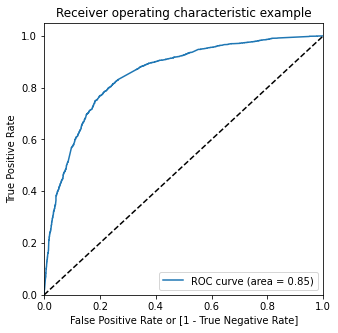

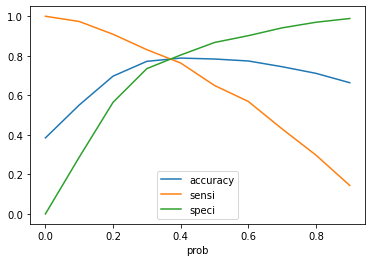

Taking cut-off value as 0.35, from the plot above


TRAIN TEST SUMMARY AT CUTOFF 0.35
Overall accuracy on train set: 0.7810781078107811
sensitivity of train set model: 0.7960768287699224
specificity of train set model: 0.77170582226762


PRECISION AND RECALL SCORES OF TRAIN SET
Precision Score of train set model: 0.7535545023696683
Recall Score of train set model: 0.6497752349816102


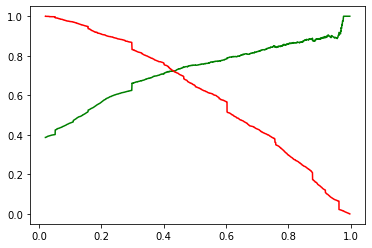



MAKING PREDICTIONS ON TEST SET
      Lead_ID  converted  conversion_Probability  final_predicted
0        2358          1                    0.28                0
1        1562          1                    0.11                0
2        6204          1                    0.32                0
3        7952          1                    0.80                1
4        3308          0                    0.20                0
...       ...        ...                     ...              ...
2722     8549          0                    0.16                0
2723     6438          1                    0.88                1
2724     2090          1                    0.43                1
2725     7085          1                    0.34                0
2726     3220          0                    0.12                0

[2727 rows x 4 columns]


TEST SET SUMMARY
Overall accuracy on Test set: 0.7924459112577924
sensitivity of our logistic regression model: 0.8120229007633588
specificity of ou

In [100]:
build_lr_model_advanced(list(selected_predictors-removed_predictors))

##### Observations

- TRAIN SET SUMMARY AT CUTOFF 0.5

-- Overall Accuracy: 78.35%

-- Sensitivity: 64.97%

-- Specificity: 86.72%

Here the Sensitivity of the model is very low. The model is failed to identify some of the converted leads correctly and its because of the arbitrary cutoff of 0.5

- ROC CURVE

The GINI (area under the ROC curve) is 0.85 which is good. A good ROC curve is the one which touches the upper-left corner of the graph; so higher the area under the curve of an ROC curve, the better is your model.

- ACCURACY, SENSITIVITY and SPECIFICITY TRADE-OFF

As you can see, at about a threshold of 0.35, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 77-79%.

- TRAIN SET SUMMARY AT CUTOFF 0.35

-- Overall Accuracy: 78.10%
-- Sensitivity: 79.60%
-- Specificity: 77.17%
-- PRECISION - RECALL TRADE-OFF

As you can see, the curve is similar to what you got for sensitivity and specificity. Except now, the curve for precision is quite jumpy towards the end. This is because the denominator of precision, i.e. (TP + FP) is not constant as these are the predicted values of 1s. And because the predicted values can swing wildly, you get a very jumpy curve.

- PRECISION AND RECALL SCORES OF TRAIN SET

-- Precision Score: 75.35
-- Recall Score: 64.97
    
### TEST SET SUMMARY

- Overall accuracy on Test set: 79.24%

- Sensitivity of our logistic regression model: 81.20%

- specificity of our logistic regression model: 78.02%


<AxesSubplot:>

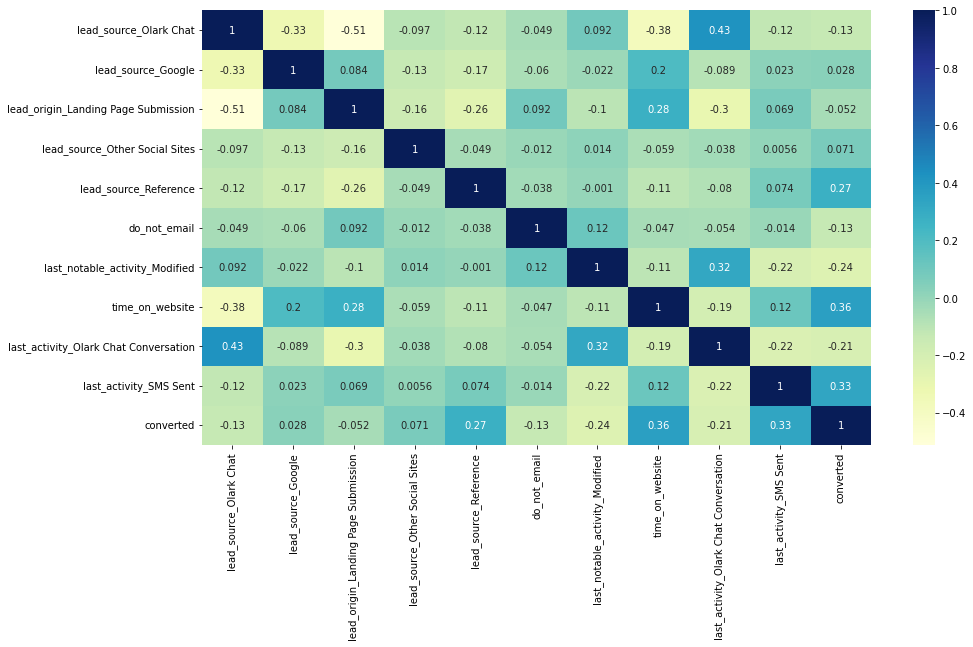

In [101]:
# Analysis of columns in our final model w.r.t. 'Converted'
col = list(selected_predictors-removed_predictors)
col.append('converted')
plt.figure(figsize=(15, 8))
sns.heatmap(leads[col].corr(), cmap="YlGnBu",annot=True)

## FINAL MODEL SUMMARY:
- Overall Accuracy : 79.24%

- Sensitivity of our logistic regression model: 81.20%

- Specificity of our logistic regression model: 78.02%

### Variables in model, that contribute towards lead conversion are:

- Affecting Positively:

time_on_website

last_activity_SMS_Send

lead_source_reference

lead_source_google

- Affecting Negatively:

last_notable_Activity_modified

Olark_chat_conversation

do_not_email

## Hot Leads:

The most potential leads are the ones having Predicted Probability > 0.35.

## Business Recommendations:

- Use Email to Communicate with the Hot Leads
- Conversion rate increases with increase in the time spend on the website, therefore increase the user engagement in their wesite.
- Try to give SMS notifications,it improves the conversion rate
- Improve the digital marketing to reach out to more people